In [1]:
import numpy as np
from matplotlib import pyplot as plt
import vaex

import illustris_python as il
from cycler import cycler

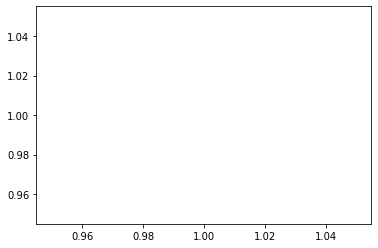

In [2]:
%matplotlib inline

plt.plot([1],[1])

font = {"weight": "normal", "size": 14}
plt.rcParams["axes.linewidth"] = 1.5  # set the value globally
plt.rc("font", **font)
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"
_legend = {"frameon": True, "framealpha":0.7}
plt.rc("legend", **_legend)
plt.rcParams["axes.prop_cycle"] = cycler("color",('indigo','b','r','k','#ff7f0e','g'))
plt.show()

In [3]:
path = "/net/virgo01/data/users/spirov/Nexus Project/"
df = vaex.open(path+"135.hdf5")

In [65]:
@vaex.register_function()
def correct(x):
    L = 75000
    return np.where(np.abs(x)>L/2, x-np.sign(x)*L,x)

def localizeDataFrame(absDf, x,y,z):
    rx = absDf.X - x
    ry = absDf.Y - y
    rz = absDf.Z - z
    
    L = 75000
    
    relx = rx.correct()
    rely = ry.correct()
    relz = rz.correct()
    
    
    relR = np.sqrt(relx**2 + rely**2+relz**2)
    
    theta = np.arccos(relz/relR)
    fi = np.arctan2(rely,relx)
    
    relDf = absDf.copy()
    
    Vaway = (relx*absDf.Vx+rely*absDf.Vy+relz*absDf.Vz)/relR
    
    
    relDf["relX"] = relx
    relDf["relY"] = rely
    relDf["relZ"] = relz
    
    
    
    relDf["R"] = relR
    relDf["Th"] = theta
    relDf["Fi"] = fi
    relDf["Vr"] = Vaway

    
    return relDf
    
    



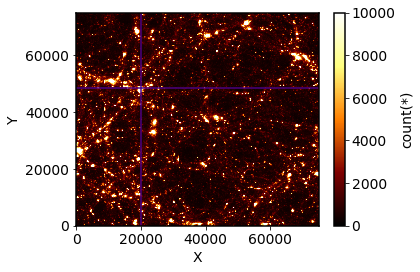

In [87]:
fx = 20026.872969109718
fy = 48608.2650390964
fz = 48593.901957099086


df.viz.heatmap("X","Y",vmin=0,vmax=1e4)
plt.axhline(fy)
plt.axvline(fx)


In [66]:

fdf = localizeDataFrame(df,fx,fy,fz)

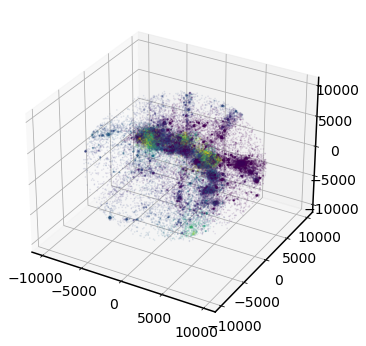

In [67]:
#%matplotlib notebook
n = 50
localFrame = fdf[fdf.R<1e4]
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(projection='3d')

Xs = localFrame.relX.values
Ys = localFrame.relY.values
Zs = localFrame.relZ.values
vrs = localFrame.Vr.values

sc = ax.scatter(Xs[::n],Ys[::n],Zs[::n],s=0.5,alpha = .1,c=vrs[::n],vmin = -500,vmax=500)

plt.show()



In [68]:
localFrame.relZ.mean()

array(261.72996058)

In [90]:
Xs = []
Ys = []
Zs = []

fx = 20026.872969109718
fy = 48608.2650390964
fz = 48593.901957099086

w=1
siz = 1e4


for i in range(100):
    fatDf = localizeDataFrame(df, fx,fy,fz)
    cutFat = fatDf[fatDf.R<siz]
    rrx =cutFat.relX.mean()
    rry = cutFat.relY.mean()
    rrz = cutFat.relZ.mean()

    Xs.append(rrx)
    Ys.append(rry)
    Zs.append(rrz)
    
    fx+=rrx*w
    fy+=rry*w  # flip + to find local minimum
    fz+=rrz*w
    
    r=np.sqrt(rrx**2+rry**2+rrz**2)
    
    #df.viz.heatmap("X","Y",vmin=0,vmax=1e4)
    #plt.axhline(fy)
    #plt.axvline(fx)
    #plt.show()
    
    print(i,r)
    
    if i==20:
        w=0.1
    
    if r < 1e-1:
        break

0 1712.4945528998135
1 688.175756323216
2 271.72364444446237
3 190.22302533422211
4 181.60461718780388
5 117.02363129076637
6 59.453184109325335
7 31.333629515901244
8 17.19811894035585
9 10.24993144766788
10 6.14539866612441
11 3.795309813038674
12 2.3968264893965063
13 1.452356749934062
14 0.8537349670893642
15 0.5630208977565493
16 0.4039599859834133
17 0.2517108340783499
18 0.14450633673333727
19 0.0838520275610819


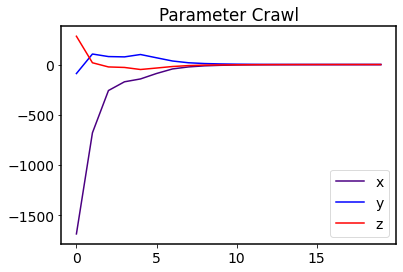

In [91]:
plt.plot(Xs,label='x')
plt.plot(Ys,label='y')
plt.plot(Zs,label='z')
plt.title('Parameter Crawl')
#plt.yscale('log')
plt.legend()
plt.show()

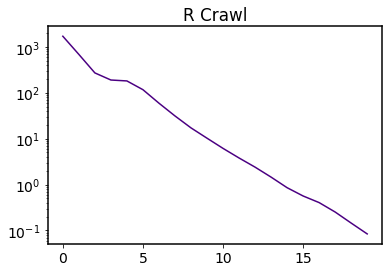

In [92]:
Rs = np.sqrt(np.square(Xs)+np.square(Ys)+np.square(Zs))
plt.plot(Rs,label='x')
plt.title('R Crawl')
plt.yscale('log')
plt.show()

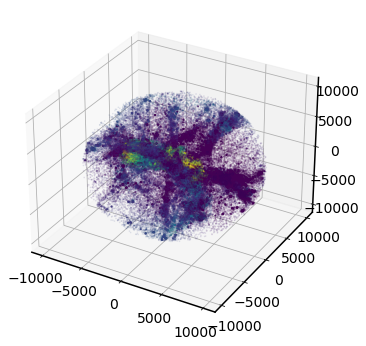

In [73]:
#%matplotlib notebook
n = 10
localFrame = cutFat
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(projection='3d')

Xs = localFrame.relX.values
Ys = localFrame.relY.values
Zs = localFrame.relZ.values
vrs = localFrame.Vr.values



ax.scatter(Xs[::n],Ys[::n],Zs[::n],s=0.5,alpha = .1,c=vrs[::n],vmin = -500,vmax=500)
plt.show()


In [93]:
localFrame

#,ID,X,Y,Z,Vx,Vy,Vz,relX,relY,relZ,R,Th,Fi,Vr
0,32968543,19752.85,47539.44,49008.516,-135.20187,41.566643,45.421795,2856.203125,-1484.05859375,296.53515625,3232.376726162222,1.4789281111796746,-0.4791976108997068,-134.38476562349786
1,36253968,19752.7,47542.203,49009.96,-31.186357,16.989326,-18.758793,2856.052734375,-1481.296875,297.98046875,3231.1097185289373,1.4784427687965207,-0.47845746129952343,-37.08505193563579
2,29689043,19753.451,47542.32,49005.54,-76.03529,103.81716,-63.191254,2856.8046875,-1481.1796875,293.55859375,3231.3159760613084,1.479822893525626,-0.4783175478183198,-120.5515624213403
3,32967668,19754.02,47543.734,49007.727,-280.15137,61.993305,2.704936,2857.373046875,-1479.765625,295.74609375,3231.370109706987,1.4791446323171593,-0.47784611781902037,-275.8682921307354
4,29685393,19749.08,47541.43,49009.867,-104.42354,81.94567,91.027435,2852.43359375,-1482.0703125,297.88671875,3228.2574734917025,1.4783901039669864,-0.47918942175539453,-121.48801448226597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"4,035,851",89086238,8366.837,52551.848,45401.367,866.0205,16.383087,117.52749,-8529.8095703125,3528.34765625,-3310.61328125,9806.479938650182,1.9151564738414502,2.749375506407264,-787.058445208206
"4,035,852",89086263,8376.308,52612.156,45557.29,900.8916,43.170246,198.41693,-8520.3388671875,3588.65625,-3154.69140625,9768.659373785005,1.8996306787645938,2.742956051026229,-833.9857528220916
"4,035,853",89086313,8257.929,52682.582,45423.113,827.7458,17.970322,193.82689,-8638.7177734375,3659.08203125,-3288.8671875,9941.47742830691,1.907971640130155,2.7409357814676656,-776.7837653590367
"4,035,854",89086338,8388.87,52639.508,45565.76,885.50793,40.21571,219.9088,-8507.7763671875,3616.0078125,-3146.21875,9765.063422066789,1.8988396686300624,2.7397018105362205,-827.4564120358831


In [105]:
Ixy = (localFrame.relX*localFrame.relY).sum().item()
Ixz = (localFrame.relX*localFrame.relZ).sum().item()
Iyz = (localFrame.relY*localFrame.relZ).sum().item()

Ixx = (localFrame.relY**2 + localFrame.relZ**2).sum().item()
Iyy = (localFrame.relX**2 + localFrame.relZ**2).sum().item()
Izz = (localFrame.relY**2 + localFrame.relX**2).sum().item()


In [107]:
InertiaTensor = np.array(((Ixx,Ixy,Ixz),(Ixy,Iyy,Iyz),(Ixz,Iyz,Izz)))

In [108]:
InertiaTensor

array([[ 6.05485515e+13, -2.15046797e+13,  1.11401640e+13],
       [-2.15046797e+13,  1.14719316e+14, -3.31598319e+12],
       [ 1.11401640e+13, -3.31598319e+12,  1.20764225e+14]])

In [115]:
vals, vecs = np.linalg.eig(InertiaTensor)

In [116]:
vals

array([5.17496313e+13, 1.28877785e+14, 1.15404677e+14])